## Lista de Exercícios: https://1drv.ms/b/s!AvhaQZpusCidtAwaReg1TJjZmUPH?e=KBnPCl

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, pearsonr

### Função para auxiliar na resolução de problemas de regressão linear

In [2]:
# x: Lista das variáveis preditoras;
# y: Lista das variáveis respostas;
# x_p: Valor de x para o cálculo da previsão, None por padrão;
# alpha: Nível de significância dos intervalos de confiança, 5% por padrão.


def regressao(x, y, x_p=False, alpha=0.05):

    # Conversão em arrays.
    x = np.asarray(x)
    y = np.asarray(y)

    # Tamanho e médias.
    n = len(x)
    x_ = x.mean()
    y_ = y.mean()

    # Somas.
    soma_x = x.sum()
    soma_y = y.sum()
    soma_x_y = (x * y).sum()
    soma_x_2 = (x**2).sum()
    soma_y_2 = (y**2).sum()

    Sxx = soma_x_2 - (soma_x**2) / n
    Syy = soma_y_2 - (soma_y**2) / n
    Sxy = soma_x_y - (soma_x * soma_y) / n

    # Parâmetros e Coeficiente de Correlação de Pearson.
    a = Sxy / Sxx
    b = y_ - a * x_
    r = Sxy / np.sqrt(Sxx * Syy)

    # Podemos usar a função pearsonr da bibliotea Scipy para calcular o Coeficiente de Correlação e o Valor-p associado.
    # r, p = pearsonr(x, y)

    # Todos os valores previstos.
    y_chapeu = a * x + b

    # Para o Desvio podemos usar qualquer uma das três equações:

    # forma_1 = np.sqrt(((y - y_chapeu)**2).sum()/(n-2))
    # forma_2 = np.sqrt((soma_y_2 - b*soma_y - a*soma_x_y)/(n-2))
    # forma_3 = np.sqrt((Syy - a*Sxy)/(n-2))

    # np.allclose(forma_1, forma_2) --> True
    # np.allclose(forma_2, forma_3) --> True

    s = np.sqrt((Syy - a * Sxy) / (n - 2))

    # Desvio Padrão Estimado.
    s_y = s * np.sqrt((1 / n) + (x_p - x_) ** 2 / Sxx)

    # Erros Padrão.
    s_a = s / np.sqrt(Sxx)
    s_b = s * np.sqrt((1 / n) + (x_**2 / Sxx))

    # Valores críticos.
    t_c = t.ppf(1 - alpha / 2, n - 2)
    t_a = a / s_a
    t_b = b / s_b

    # Margens de Erro
    E_a = t_c * s / np.sqrt(Sxx)
    E_b = t_c * s * np.sqrt(1 / n + ((soma_x / n) ** 2) / Sxx)
    E_y_ic = t_c * s_y
    E_y_ip = t_c * np.sqrt(s**2 + s_y**2)

    # Resíduos
    y_obs = False
    y_esp = a * x_p + b
    if np.argmax(x == x_p):
        y_obs = y[np.argmax(x == x_p)]
        e = y_obs - y_esp
        e_std = e / (s * np.sqrt(1 - 1 / n - (x_p - x_) ** 2 / Sxx))

    # Output formatado.
    print(f'------------------------ {"Somas":^15} -------------------------\n')
    print("Sxx:", Sxx)
    print("Syy:", Syy)
    print("Sxy:", Sxy)

    print(f'\n------------------------ {"Parâmetros":^15} -------------------------\n')
    print("a:", a)
    print("b:", b)
    print(f"reta: y = {round(a, 4)}x + {round(b, 4)}")

    if x_p:
        print(
            f'\n------------------------ {"Valor Esperado, IC e IP":^25} -------------------------\n'
        )
        print("y_p:", y_esp)
        print("IC:", (y_esp - E_y_ic, y_esp + E_y_ic))
        print("IP:", (y_esp - E_y_ip, y_esp + E_y_ip))
        print("Desvio Padrão Estimado:", s_y)

    print(
        f'\n------------------------ {"Coeficientes":^15} -------------------------\n'
    )
    print("r:", r)
    print("r²:", r**2)

    print(
        f'\n--------------------- {"Desvio e Erros Padrão":^21} ----------------------\n'
    )
    print("s:", s)
    print("sb:", s_b)
    print("sa:", s_a)

    print(
        f'\n------------------------ {"Valor Crítico":^15} -------------------------\n'
    )
    print("tc:", t_c)

    print(
        f'\n------------------------ {"Margens de Erro":^15} -------------------------\n'
    )
    print("Ea:", E_a)
    print("Eb:", E_b)

    print(
        f'\n------------------------ {"IC e t Críticos":^15} -------------------------\n'
    )
    print("Para a:", (a - E_a, a + E_a, t_a))
    print("Para b:", (b - E_b, b + E_b, t_b), end="\n\n")

    if y_obs:
        print(
            f'\n------------------------ {"Resíduos":^15} -------------------------\n'
        )
        print("e:", e)
        print("e*:", e_std)
    else:
        print(
            f'\n------------------------ {"Resíduos":^15} -------------------------\n'
        )
        print(f"O valor de {x_p} não foi observado na amostra de variáveis preditoras!")

    print(f"\n------------------------------------------------------------------\n")

    # DataFrame para plotagem.
    dados = pd.DataFrame([x, y]).T
    dados.columns = ["x", "y"]

    # Plotagem.
    sns.lmplot(x="x", y="y", data=dados, ci=100 - 100 * alpha, height=6, aspect=1.5)

### Exercício 1

In [3]:
x = np.array([11, 5, 3, 9, 12, 6, 5, 9, 4, 7, 8, 10, 13, 11, 7, 10, 13, 4, 6, 2]) * 1000
y = (
    np.array(
        [25, 13, 8, 20, 25, 12, 10, 15, 10, 16, 18, 20, 26, 22, 14, 15, 27, 13, 16, 6]
    )
    * 10000
)

------------------------      Somas      -------------------------

Sxx: 213750000.0
Syy: 72495000000.0
Sxy: 3707500000.0

------------------------   Parâmetros    -------------------------

a: 17.34502923976608
b: 31076.023391812865
reta: y = 17.345x + 31076.0234

------------------------  Valor Esperado, IC e IP  -------------------------

y_p: 239216.37426900584
IC: (222782.62983352283, 255650.11870448885)
IP: (191488.34791262716, 286944.40062538453)
Desvio Padrão Estimado: 7822.158138527677

------------------------  Coeficientes   -------------------------

r: 0.9418333636701189
r²: 0.8870500849221705

--------------------- Desvio e Erros Padrão ----------------------

s: 21328.52041225454
sb: 12270.74382005042
sa: 1.4588400149986325

------------------------  Valor Crítico  -------------------------

tc: 2.10092204024096

------------------------ Margens de Erro -------------------------

Ea: 3.06490914069608
Eb: 25779.87614169448

------------------------ IC e t Críticos -------

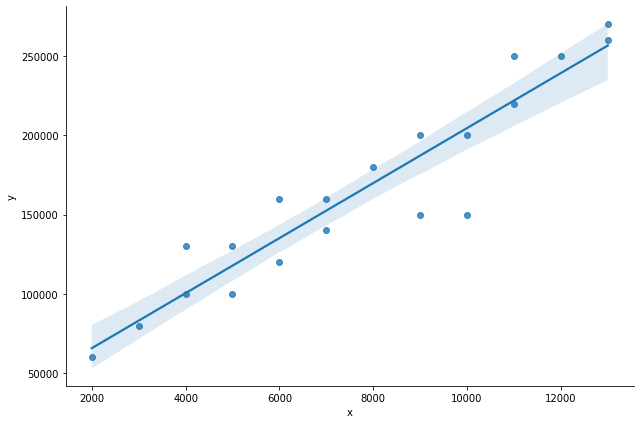

In [4]:
# Para um investimento de R$12000 em marketing, espera-se que as vendas sejam de 239216 unidades.
regressao(x, y, 12000)

### Exercício 2

In [5]:
n = 20
soma_x = 81300
soma_y = 240.4
Syy = 73.71
Sxy = -41526
Sxx = 25945500

In [6]:
a = Sxy / Sxx
b = soma_y / n - a * soma_x / n
r = Sxy / np.sqrt(Sxx * Syy)

a, b, r

(-0.001600508758744291, 18.52606810429554, -0.9495675651511465)

#### A equação da reta é y = -0,0016x + 18,5261 e o Coeficiente de Pearson é cerca de -0.95

In [7]:
alpha = 0.05
s = np.sqrt((Syy - a * Sxy) / (n - 2))
t_c = t.ppf(1 - alpha / 2, n - 2)
E_a = t_c * s / np.sqrt(Sxx)
E_b = t_c * s * np.sqrt(1 / n + ((soma_x / n) ** 2) / Sxx)

#### Os Intervalos de Confiança para os dois parâmetros são:

In [8]:
E_a, a - E_a, a + E_a

(0.000261715823716452, -0.001862224582460743, -0.001338792935027839)

In [9]:
E_b, b - E_b, b + E_b

(1.1048469190951247, 17.421221185200416, 19.630915023390664)

#### Exercício Extra de Atividade Avaliativa

In [10]:
x = [
    7.01,
    7.11,
    7.12,
    7.24,
    7.94,
    7.94,
    8.04,
    8.05,
    8.07,
    8.90,
    8.94,
    8.95,
    8.97,
    8.98,
    9.85,
    9.86,
    9.86,
    9.87,
]
y = [60, 67, 66, 52, 50, 45, 52, 48, 40, 23, 20, 40, 31, 26, 9, 22, 13, 7]

------------------------      Somas      -------------------------

Sxx: 17.271400000000313
Syy: 6217.6111111111095
Sxy: -311.47666666666646

------------------------   Parâmetros    -------------------------

a: -18.034245438508798
b: 190.26829324779405
reta: y = -18.0342x + 190.2683

------------------------  Valor Esperado, IC e IP  -------------------------

y_p: 45.99432973972367
IC: (42.160021054142305, 49.82863842530503)
IP: (30.910495479330187, 61.07816400011715)
Desvio Padrão Estimado: 1.610008664235449

------------------------  Coeficientes   -------------------------

r: -0.9504952910870057
r²: 0.9034412983785717

--------------------- Desvio e Erros Padrão ----------------------

s: 6.12558393173589
sb: 12.587118179747488
sa: 1.4739532996453948

------------------------  Valor Crítico  -------------------------

tc: 2.381545373485414

------------------------ Margens de Erro -------------------------

Ea: 3.5102866615040504
Eb: 29.97679306649178

------------------------ I

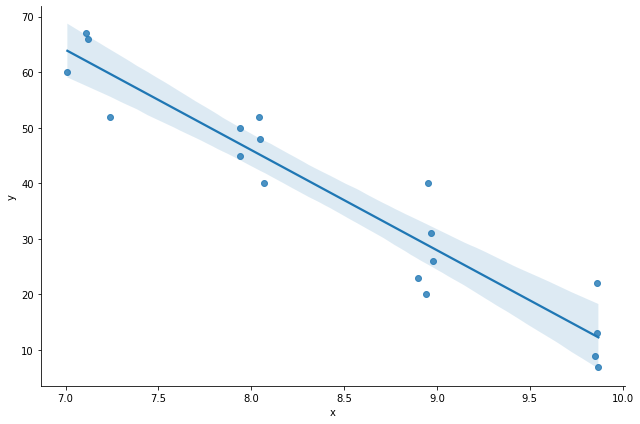

In [11]:
regressao(x, y, 8, 0.03)